In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BIdf = pd.read_csv('../data/British_Italian_images.csv')
RFdf = pd.read_csv('../data/russian_french_stats.csv')
BIdf = BIdf.drop(['Unnamed: 0'], axis=1)

In [3]:
list(BIdf)

['name',
 'year',
 'nationality',
 'width',
 'height',
 'mean_hue',
 'mean_saturation',
 'mean_brightness']

In [4]:
list(RFdf)

['name',
 'year',
 'nationality',
 'width',
 'height',
 'mean_hue',
 'mean_saturation',
 'mean_brightness']

In [46]:
df = pd.concat([BIdf, RFdf], axis=0)
df= df.reset_index(drop=True)
df = df.drop_duplicates(keep='first')
df = df.dropna()
df['resolution'] = df['width'] * df['height']

In [48]:
df = df.drop([4551,4552,4553,4554],axis=0) #years not accurate
italian = df[df['nationality'] == 'Italian'] #just italian paintings

### We can see that each nationality follows roughly the same pattern of hue progression, with a spike in the .1 to .2 mean hue area

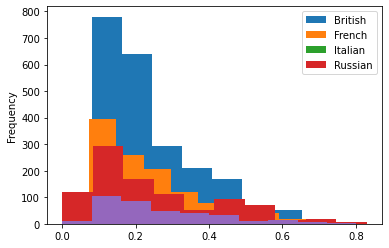

In [49]:
df.groupby('nationality')['mean_hue'].plot(kind='hist', legend = True)


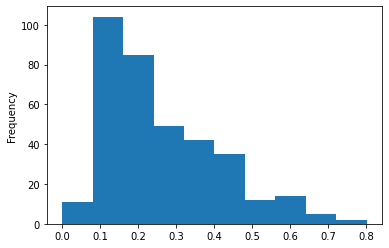

In [50]:
italian['mean_hue'].plot(kind='hist')


### Here we can see that while every nationality follows a roughly normal curve for distribution of mean saturation, French paintings seem to have a higher mean saturation than Russian, Italian, or British. Italian paintings have a slightly higher mean saturation than British and Russian paintings, with those having an almost equal high point for mean saturation. 

nationality
British    AxesSubplot(0.125,0.125;0.775x0.755)
French     AxesSubplot(0.125,0.125;0.775x0.755)
Italian    AxesSubplot(0.125,0.125;0.775x0.755)
Russian    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_saturation, dtype: object

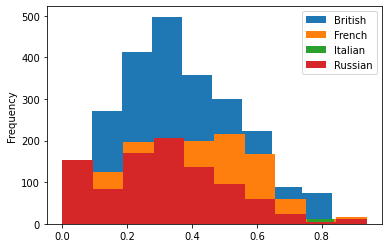

In [53]:
df.groupby('nationality')['mean_saturation'].plot(kind='hist', legend = True)

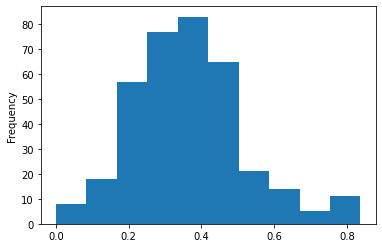

In [51]:
italian['mean_saturation'].plot(kind='hist')

### Looking at the distribution for mean brightness, we can wee that British paintings have more paintings with a higher mean brightness than French, Italian, or Russian paintings. French and Russian paintings have the lowest mean brightness. 

nationality
British    AxesSubplot(0.125,0.125;0.775x0.755)
French     AxesSubplot(0.125,0.125;0.775x0.755)
Italian    AxesSubplot(0.125,0.125;0.775x0.755)
Russian    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_brightness, dtype: object

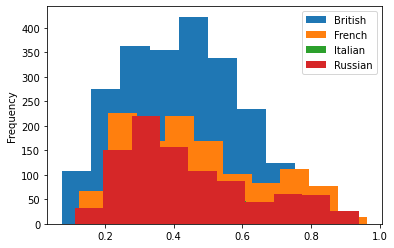

In [41]:
df.groupby('nationality')['mean_brightness'].plot(kind='hist', legend= True)

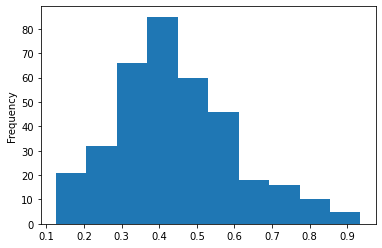

In [52]:
italian['mean_brightness'].plot(kind='hist')

### With a bivariate analysis, we can slightly see that as mean brightness increases, mean saturation decreases. This follows with what we observed with the mean brightness and mean saturation variables individually. The mean saturation of paintings was concerntrated lower than the mean brightness of most paintings. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11df26dd0>,
      dtype=object)

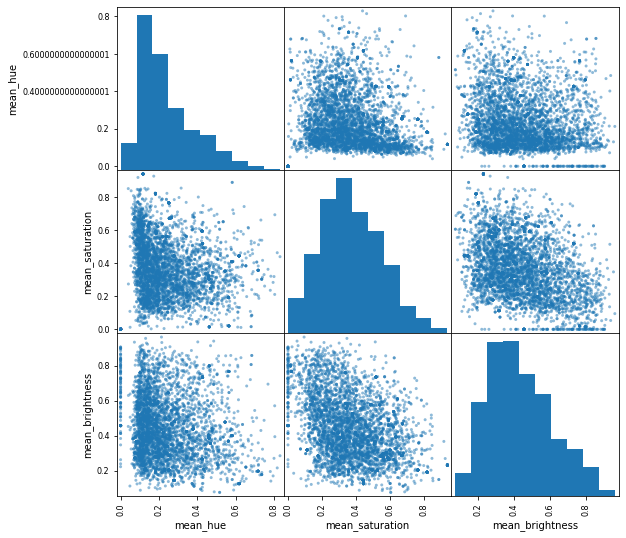

In [59]:
pd.plotting.scatter_matrix(df[['mean_hue', 'mean_saturation', 'mean_brightness']], figsize = (9,9))


In [76]:
new = []
for i in df['year']:
    if i < 1900:
        new.append(0)
    else:
        new.append(1)
df['new'] = new

### Dividing our paintings into centuries (roughly 19th and 20th centuries, blue and orange respectively), we can see that both centuries follow the same pattern for mean hue, with most paintings having a highest mean huge of about .1. Throughout the centuries, paintings did not vary much in their mean hue.

new
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_hue, dtype: object

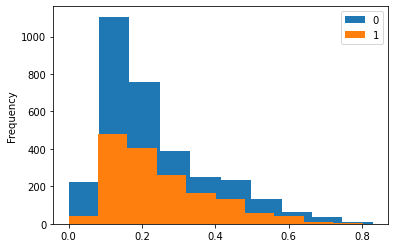

In [79]:
df.groupby('new')['mean_hue'].plot(kind='hist', legend = True)


### Looking at the mean saturation of the two centuries, we can see that the 20th century has a slightly lower peak mean saturation than the 19th century. We can interpret this as showing that paintings from the 19th century were on average more saturated than those of the 20th century. 

new
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_saturation, dtype: object

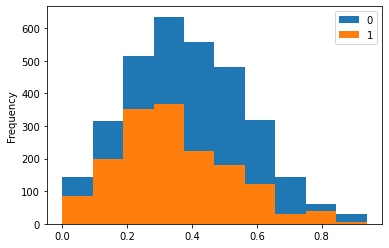

In [80]:
df.groupby('new')['mean_saturation'].plot(kind='hist', legend = True)


### Looking at mean brightness, we can see that the distributions for the 19th and 20th century are very different. Paintings from the 19th century were on average much less bright than those of the 20th century. This makes it the only feature to truly discern between the two centuries. 

new
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_brightness, dtype: object

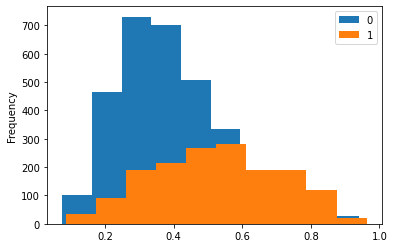

In [81]:
df.groupby('new')['mean_brightness'].plot(kind='hist', legend = True)
